In [1]:
import pandas as pd
import sys
import os
import glob
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns
import pprint
# from IPython.display import display
import sklearn
import numpy as np
import seaborn as sns
from Bio import SeqIO

from process_alignment_table import *
set_pandas_display_options()

%matplotlib inline

In [2]:
def exact_mc_perm_test(xs, ys, nmc):
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff <= np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc

## Virus

In [3]:
df1 = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/batch_tables/batch_00514/batch_00514.viral.csv', index_col=0)
df2 = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/batch_tables/batch_01013/batch_01013.viral.csv', index_col=0)

In [5]:
from sklearn.preprocessing import normalize
df_copy = df1.drop('pop_average', axis=1)
columns = []
for col, source, fam in zip(df_copy.columns.values, df_copy.loc['seq_source'].values, df_copy.loc['family'].values):
    columns.append(f'{col} - {source} - {fam}')
df_copy = df_copy.drop(['seq_source', 'family', 'relationship'], axis=0)
    
cols = df_copy.columns
df_copy[cols] = df_copy[cols].apply(pd.to_numeric)

contig_df = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/ref_genome/contig_df.csv', index_col=0)
index = []
for idx in df_copy.index.values:
    index.append(contig_df.loc[idx].short_des)

# threshold = 10
# df_copy = df_copy[df_copy.ge(threshold).any(axis=1)]
df_scaled = normalize(df_copy)

df_scaled = pd.DataFrame(df_scaled, columns=columns, index=index)

from sklearn.metrics import pairwise_distances
distance = pairwise_distances(df_scaled.T)

family1 = defaultdict(list)
for idx, col in enumerate(columns):
    family1[col.split(' - ')[2]].append(idx)
    
fam1_samples = set()
for i in range(64):
    fam1_samples.add(i)

distance_in_family = []
distance_others = []

for idx, sample in enumerate(columns):
    fam = sample.split(' - ')[2]
    rel = family1[fam].copy()
    others = list(fam1_samples - set(rel))
    rel.remove(idx)
#     dist_in_fam = 0
#     dist_others = 0
#     for r in rel:
#         dist_in_fam += distance[idx, r]
#     for o in others:
#         dist_others += distance[idx, o]
#     distance_in_family.append(dist_in_fam/len(rel))
#     distance_others.append(dist_others/len(others))
    for r in rel:
        distance_in_family.append(distance[idx, r])
    for o in others:
        distance_others.append(distance[idx, o])
    
# assert(len(distance_in_family) == len(fam1_samples))
# assert(len(distance_others) == len(fam1_samples))

In [6]:
from sklearn.preprocessing import normalize
df_copy = df2.drop('pop_average', axis=1)
columns = []
for col, source, fam in zip(df_copy.columns.values, df_copy.loc['seq_source'].values, df_copy.loc['family'].values):
    columns.append(f'{col} - {source} - {fam}')
df_copy = df_copy.drop(['seq_source', 'family', 'relationship'], axis=0)
    
cols = df_copy.columns
df_copy[cols] = df_copy[cols].apply(pd.to_numeric)

contig_df = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/ref_genome/contig_df.csv', index_col=0)
index = []
for idx in df_copy.index.values:
    index.append(contig_df.loc[idx].short_des)

# threshold = 10
# df_copy = df_copy[df_copy.ge(threshold).any(axis=1)]
df_scaled = normalize(df_copy)

df_scaled = pd.DataFrame(df_scaled, columns=columns, index=index)

from sklearn.metrics import pairwise_distances
distance = pairwise_distances(df_scaled.T)

family2 = defaultdict(list)
for idx, col in enumerate(columns):
    family2[col.split(' - ')[2]].append(idx)
    
fam2_samples = set()
for i in range(95):
    fam2_samples.add(i)

for idx, sample in enumerate(columns):
    fam = sample.split(' - ')[2]
    rel = family2[fam].copy()
    others = list(fam2_samples - set(rel))
    rel.remove(idx)
#     dist_in_fam = 0
#     dist_others = 0
#     for r in rel:
#         dist_in_fam += distance[idx, r]
#     for o in others:
#         dist_others += distance[idx, o]
#     distance_in_family.append(dist_in_fam/len(rel))
#     distance_others.append(dist_others/len(others))
    for r in rel:
        distance_in_family.append(distance[idx, r])
    for o in others:
        distance_others.append(distance[idx, o])
    
# assert(len(distance_in_family)-len(fam1_samples) == len(fam2_samples))
# assert(len(distance_others)-len(fam1_samples) == len(fam2_samples))

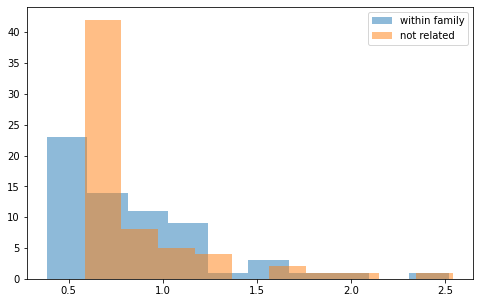

In [65]:
# fig, ax = plt.subplots(figsize=(8,5))
# plt.hist(distance_in_family, label='within family', alpha=0.5, bins=10)
# plt.hist(distance_others, label='not related', alpha=0.5, bins=10)
# plt.legend(loc='best')

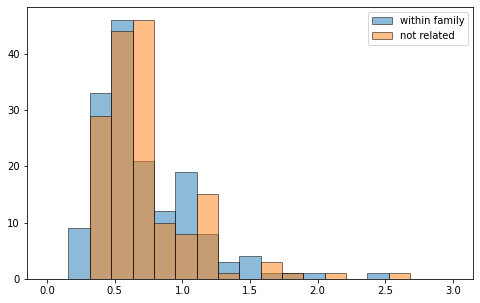

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
bins = np.linspace(0, 3, 20)
plt.hist(distance_in_family, label='within family', alpha=0.5, bins=bins, edgecolor='k')
plt.hist(distance_others, label='not related', alpha=0.5, bins=bins, edgecolor='k')
plt.legend(loc='best')

In [6]:
from scipy.stats import ttest_ind

ttest_ind(distance_in_family, distance_others)

Ttest_indResult(statistic=-0.4947215368356248, pvalue=0.6211404739023434)

In [8]:
exact_mc_perm_test(distance_in_family, distance_others, 300000)

0.6243266666666667

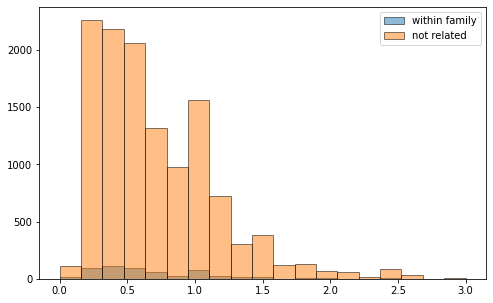

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
bins = np.linspace(0, 3, 20)
plt.hist(distance_in_family, label='within family', alpha=0.5, bins=bins, edgecolor='k')
plt.hist(distance_others, label='not related', alpha=0.5, bins=bins, edgecolor='k')
plt.legend(loc='best')

In [8]:
exact_mc_perm_test(distance_in_family, distance_others, 300000)

0.6986166666666667

## Bacteria/Eukryotes/Archaea

In [9]:
df1 = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/batch_tables/batch_00514/batch_00514.bacterial.csv', index_col=0)
df2 = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/batch_tables/batch_01013/batch_01013.bacterial.csv', index_col=0)

In [11]:
from sklearn.preprocessing import normalize
df_copy = df1.drop('pop_average', axis=1)
columns = []
for col, source, fam in zip(df_copy.columns.values, df_copy.loc['seq_source'].values, df_copy.loc['family'].values):
    columns.append(f'{col} - {source} - {fam}')
df_copy = df_copy.drop(['seq_source', 'family', 'relationship'], axis=0)
    
cols = df_copy.columns
df_copy[cols] = df_copy[cols].apply(pd.to_numeric)

contig_df = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/ref_genome/contig_df.csv', index_col=0)
index = []
for idx in df_copy.index.values:
    index.append(contig_df.loc[idx].short_des)

# threshold = 10
# df_copy = df_copy[df_copy.ge(threshold).any(axis=1)]
df_scaled = normalize(df_copy)

df_scaled = pd.DataFrame(df_scaled, columns=columns, index=index)

from sklearn.metrics import pairwise_distances
distance = pairwise_distances(df_scaled.T)

family1 = defaultdict(list)
for idx, col in enumerate(columns):
    family1[col.split(' - ')[2]].append(idx)
    
fam1_samples = set()
for i in range(64):
    fam1_samples.add(i)

distance_in_family = []
distance_others = []

for idx, sample in enumerate(columns):
    fam = sample.split(' - ')[2]
    rel = family1[fam].copy()
    others = list(fam1_samples - set(rel))
    rel.remove(idx)
#     dist_in_fam = 0
#     dist_others = 0
#     for r in rel:
#         dist_in_fam += distance[idx, r]
#     for o in others:
#         dist_others += distance[idx, o]
#     distance_in_family.append(dist_in_fam/len(rel))
#     distance_others.append(dist_others/len(others))
    for r in rel:
        distance_in_family.append(distance[idx, r])
    for o in others:
        distance_others.append(distance[idx, o])
    
# assert(len(distance_in_family) == len(fam1_samples))
# assert(len(distance_others) == len(fam1_samples))

In [12]:
from sklearn.preprocessing import normalize
df_copy = df2.drop('pop_average', axis=1)
columns = []
for col, source, fam in zip(df_copy.columns.values, df_copy.loc['seq_source'].values, df_copy.loc['family'].values):
    columns.append(f'{col} - {source} - {fam}')
df_copy = df_copy.drop(['seq_source', 'family', 'relationship'], axis=0)
    
cols = df_copy.columns
df_copy[cols] = df_copy[cols].apply(pd.to_numeric)

contig_df = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/ref_genome/contig_df.csv', index_col=0)
index = []
for idx in df_copy.index.values:
    index.append(contig_df.loc[idx].short_des)

# threshold = 10
# df_copy = df_copy[df_copy.ge(threshold).any(axis=1)]
df_scaled = normalize(df_copy)

df_scaled = pd.DataFrame(df_scaled, columns=columns, index=index)

from sklearn.metrics import pairwise_distances
distance = pairwise_distances(df_scaled.T)

family2 = defaultdict(list)
for idx, col in enumerate(columns):
    family2[col.split(' - ')[2]].append(idx)
    
fam2_samples = set()
for i in range(95):
    fam2_samples.add(i)

for idx, sample in enumerate(columns):
    fam = sample.split(' - ')[2]
    rel = family2[fam].copy()
    others = list(fam2_samples - set(rel))
    rel.remove(idx)
#     dist_in_fam = 0
#     dist_others = 0
#     for r in rel:
#         dist_in_fam += distance[idx, r]
#     for o in others:
#         dist_others += distance[idx, o]
#     distance_in_family.append(dist_in_fam/len(rel))
#     distance_others.append(dist_others/len(others))
    for r in rel:
        distance_in_family.append(distance[idx, r])
    for o in others:
        distance_others.append(distance[idx, o])
    
# assert(len(distance_in_family)-len(fam1_samples) == len(fam2_samples))
# assert(len(distance_others)-len(fam1_samples) == len(fam2_samples))

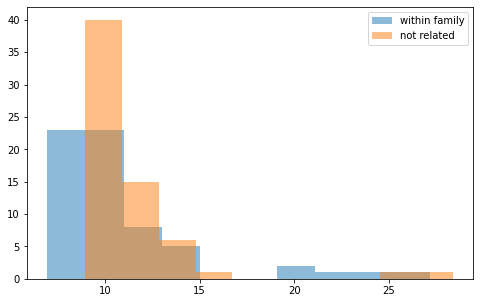

In [57]:
# fig, ax = plt.subplots(figsize=(8,5))
# plt.hist(distance_in_family, label='within family', alpha=0.5, bins=10)
# plt.hist(distance_others, label='not related', alpha=0.5, bins=10)
# plt.legend(loc='best')

In [58]:
# from scipy.stats import ttest_ind

# ttest_ind(distance_in_family, distance_others)

Ttest_indResult(statistic=-0.891691428105135, pvalue=0.37425802259439633)

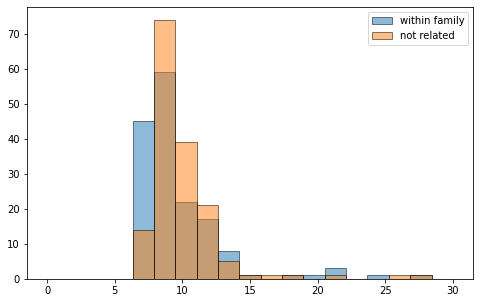

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
bins = np.linspace(0, 30, 20)
plt.hist(distance_in_family, label='within family', alpha=0.5, bins=bins, edgecolor='k')
plt.hist(distance_others, label='not related', alpha=0.5, bins=bins, edgecolor='k')
plt.legend(loc='best')

In [11]:
from scipy.stats import ttest_ind

ttest_ind(distance_in_family, distance_others)

Ttest_indResult(statistic=-0.7880041615833008, pvalue=0.4312849723362432)

In [12]:
exact_mc_perm_test(distance_in_family, distance_others, 300000)

0.43445666666666666

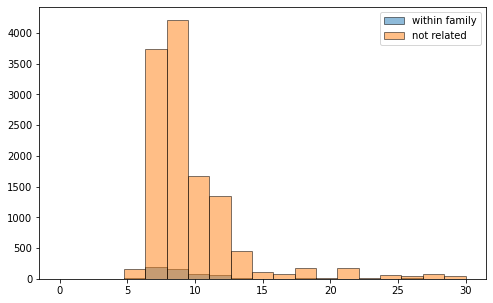

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
bins = np.linspace(0, 30, 20)
plt.hist(distance_in_family, label='within family', alpha=0.5, bins=bins, edgecolor='k')
plt.hist(distance_others, label='not related', alpha=0.5, bins=bins, edgecolor='k')
plt.legend(loc='best')

In [14]:
exact_mc_perm_test(distance_in_family, distance_others, 300000)

0.45355666666666666